The Solow Growth Model
====================

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
α = 1/3
n = 0.02
g = 0.03
δ = 0.08
s = 0.2

## Model fundamentals

In [3]:
def F(A,K,L):
    return A*K**α*L**(1-α)

In [4]:
K = np.linspace(0,40,60)

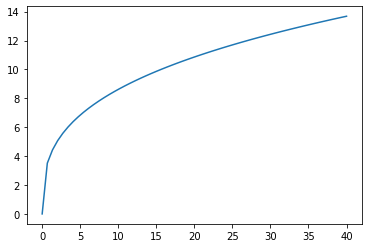

In [5]:
fig, ax = plt.subplots()
ax.plot(K,F(1,K,8))

In [6]:
K1 = 8 
L1 = 6
Y1 = F(1,K1,L1)
print(Y1)

6.603854497789254


In [7]:
K2 = 16
L2 = 12
Y2 = F(1,K2,L2)
print(Y2)

13.20770899557851


In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [9]:
kgrid = np.linspace(0,40,60)
lgrid = kgrid
x, y = np.meshgrid(kgrid,lgrid)

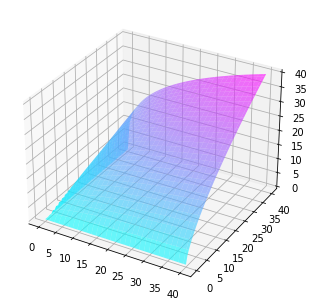

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,
                y,
                F(1,x, y),
                rstride=2, cstride=2,
                alpha=0.6,
                cmap='cool')

## Using symbols

In [18]:
from sympy import *

In [15]:
A, K, L, α = symbols('A K L α')

In [16]:
F = A*K**α*L**(1-α)

In [17]:
F

A*K**α*L**(1 - α)

In [19]:
MPK = diff(F,K)

In [20]:
MPK

A*K**α*L**(1 - α)*α/K

In [22]:
simplify(MPK)

A*K**(α - 1)*L**(1 - α)*α

In [23]:
K

K

In [24]:
K_values = np.linspace(0,40,60)

In [28]:
Y = np.zeros(60)

In [33]:
Y = [ F.subs([(A,1),(K,K_value),(L,8),(α, 1/3)]) for K_value in K_values ]

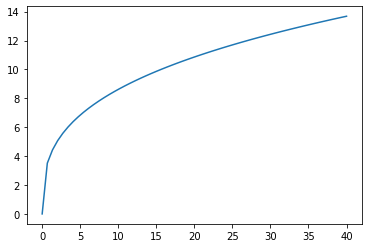

In [35]:
fig, ax = plt.subplots()
ax.plot(K_values,Y)

## Simulate an economy

In [33]:
T = 100
k_t = np.zeros(T)
k_t[0] = 0.1
A = 1

In [35]:
for i in range(1,T):
    k_t[i] = k_t[i-1] + s*f(A,k_t[i-1])-(n+δ)*k_t[i-1]

No handles with labels found to put in legend.


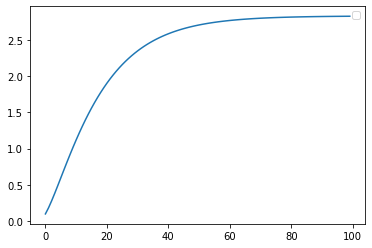

In [36]:
fig, ax = plt.subplots()
ax.plot(range(T),k_t)
ax.legend()

## China vs. the USA

$$
\Delta K_t = K_{t+1}-K_{t} = s F(A,K_{t},L_t) - \delta K_t
$$

In [135]:
T = 30
Lc = np.zeros(T)
Lc[0] = 1.2
La = np.zeros(T)
La[0] = 1
Kc = np.zeros(T)
Kc[0] = 0.01
Ka = np.zeros(T)
Ka[0] = 2
nc = 0.02
na = 0.02
sc = 0.2
sa = 0.2
Yc = np.zeros(T)
Ya = np.zeros(T)
Yc[0] = F(1,Kc[0],Lc[0])
Ya[0] = F(1,Ka[0],La[0])

In [136]:
# China
for t in range(1,T):
    Lc[t] = (1+nc)*Lc[t-1]
    Kc[t] = Kc[t-1] + sc*Yc[t-1] - δ*Kc[t-1]
    Yc[t] = F(1,Kc[t],Lc[t])

In [137]:
# China
for t in range(1,T):
    La[t] = (1+na)*La[t-1]
    Ka[t] = Ka[t-1] + sa*Ya[t-1] - δ*Ka[t-1]
    Ya[t] = F(1,Ka[t],La[t])

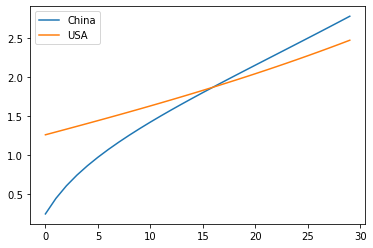

In [138]:
fig, ax = plt.subplots()
ax.plot(range(T),Yc,label='China')
ax.plot(range(T),Ya,label='USA')
ax.legend()

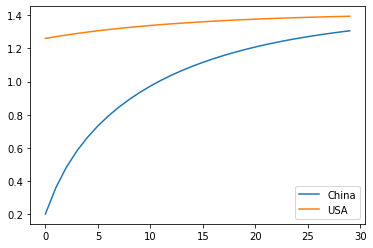

In [139]:
fig, ax = plt.subplots()
ax.plot(range(T),Yc/Lc,label='China')
ax.plot(range(T),Ya/La,label='USA')
ax.legend()

## Production function for capital per worker

In [14]:
def f(A,k):
    return A*k**α

In [18]:
k = np.linspace(0,10,20)

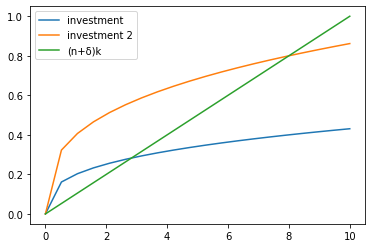

In [31]:
fig, ax = plt.subplots()
#ax.plot(k,f(1,k),label='f(k)')
ax.plot(k,s*f(1,k),label='investment')
#ax.plot(k,s*f(2,k),label='investment 2')
ax.plot(k,(n+δ)*k, label='(n+δ)k')
ax.legend()

## Saving rate

In [37]:
s2 = 0.6

In [39]:
k_2t = np.zeros(T)
k_2t[0] = 0.1

In [40]:
for i in range(1,T):
    k_2t[i] = k_2t[i-1] + s2*f(A,k_2t[i-1])-(n+δ)*k_2t[i-1]

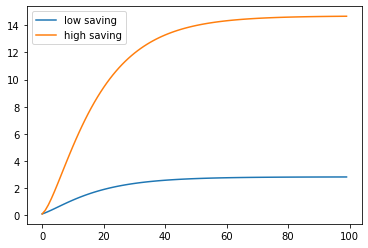

In [41]:
fig, ax = plt.subplots()
ax.plot(range(T),k_t, label='low saving')
ax.plot(range(T),k_2t, label='high saving')
ax.legend()

## Catching up

In [42]:
k_3t = np.zeros(T)
k_3t[0] = 2

In [45]:
for i in range(1,T):
    k_3t[i] = k_3t[i-1] + s*f(A,k_3t[i-1])-(n+δ)*k_3t[i-1]

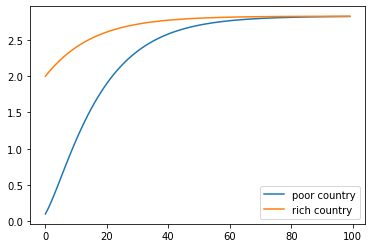

In [46]:
fig, ax = plt.subplots()
ax.plot(range(T),k_t, label='poor country')
ax.plot(range(T),k_3t, label='rich country')
ax.legend()

## Technological advance

In [48]:
k_4t = np.zeros(T)
k_4t[0] = 0.1
A = np.zeros(T)
A[0] = 0.1

In [50]:
for i in range(1,T):
    A[i] = (1+g)*A[i-1]
    k_4t[i] = k_4t[i-1] + s*f(A[i],k_4t[i-1])-(n+δ)*k_4t[i-1]

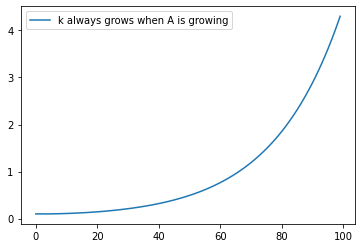

In [53]:
fig, ax = plt.subplots()
ax.plot(range(T),k_4t, label='k always grows when A is growing')
ax.legend()